In [1]:
import micromagneticmodel as mm
import discretisedfield as df
import oommfc as oc
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import micromagneticdata as md
from cycler import cycler
plt.style.use('seaborn-v0_8-white')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'

In [6]:
data = md.Data(name='skg')
data[58][-1].orientation.write('sky2.vtk')

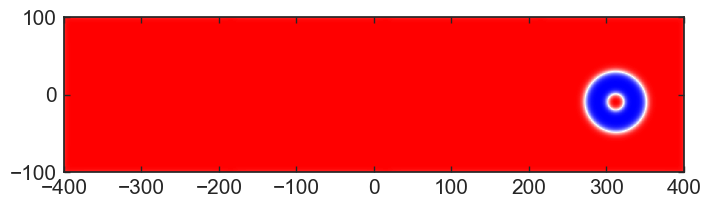

In [9]:
data = md.Data(name='wenzhang1')
with plt.style.context(['seaborn-white']):
    fig, ax = plt.subplots(dpi=100)
    data[11][175].plane(z=3e-9).z.mpl.scalar(ax=ax,cmap='bwr',colorbar=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(which='major',length=4,labelsize=15,direction='in')
    plt.savefig('f:/tupian/lianxu_6.png',dpi=600,bbox_inches='tight')
    plt.show()

In [3]:
l=100e-9
w=100e-9
region=df.Region(p1=(-l,-w,0),p2=(l,w,1e-9))
cell=(2e-9,2e-9,1e-9)
mesh=df.Mesh(region=region,cell=cell)

In [161]:
Ms = 0.58e6
A = 15e-12
D = 3.5e-3
K = 0.8e6
def Ms_fun(pos):
    x,y,z = pos
    if (x**2+y**2)**0.5 <= l:
        return Ms
    else:
        return 0
def m_init(pos):
    x,y,z=pos
    if ((x+20e-9)**2+(y+20e-9)**2)**0.5 <= 10e-9:
        return (0,0,1)
    elif ((x-20e-9)**2+(y-20e-9)**2)**0.5 <= 10e-9:
        return (0,0,1)
    elif ((x+20e-9)**2+(y-20e-9)**2)**0.5 <= 10e-9:
        return (0,0,1)
    elif ((x-20e-9)**2+(y+20e-9)**2)**0.5 <= 10e-9:
        return (0,0,1)
    elif (x**2+y**2)**0.5 <= 70e-9:
        return (0,0,-1)
    else:
        return (0,0,1)
system=mm.System(name='skg')
system.energy=mm.Exchange(A=A)+mm.UniaxialAnisotropy(K=K,u=(0,0,1))\
             +mm.Demag()+mm.DMI(D=D,crystalclass='Cnv_z')
system.dynamics=mm.Precession(gamma0=2.211e5)+mm.Damping(alpha=0.3)
system.m=df.Field(mesh=mesh,dim=3,value=m_init,norm=Ms)


In [ ]:
data = md.Data(name='skg')
Ms = 0.58e6
A = 15e-12
D = 3.5e-3
for i,j in zip(range(73,66,-1),range(1,8,1)): 
    K = j*1e5
    m = data[i][-1].orientation
    system=mm.System(name='skg')
    system.energy=mm.Exchange(A=A)+mm.UniaxialAnisotropy(K=K,u=(0,0,1))\
                +mm.Demag()+mm.DMI(D=D,crystalclass='Cnv_z')
    system.dynamics=mm.Precession(gamma0=2.211e5)+mm.Damping(alpha=0.3)
    system.m=df.Field(mesh=mesh,dim=3,value=m,norm=Ms)
    oc.compute(system.energy.uniaxialanisotropy.density,system)

In [4]:
data = md.Data(name='skg')
Ms = 0.58e6
A = 15e-12
D = 3.5e-3
K = 8*1e5
m = data[93][-1].orientation
system=mm.System(name='skg')
system.energy=mm.Exchange(A=A)+mm.UniaxialAnisotropy(K=K,u=(0,0,1))\
            +mm.Demag()+mm.DMI(D=D,crystalclass='Cnv_z')
system.dynamics=mm.Precession(gamma0=2.211e5)+mm.Damping(alpha=0.3)
system.m=df.Field(mesh=mesh,dim=3,value=m,norm=Ms)
oc.compute(system.energy.exchange.density,system)

Running OOMMF (ExeOOMMFRunner)[2023/03/22 12:56]... (9.1 s)


Field(Mesh(Region(p1=(-1e-07, -1e-07, 0.0), p2=(1.0000000000000002e-07, 1.0000000000000002e-07, 1e-09)), n=(100, 100, 1), attributes: (unit: m, fourierspace: False, isplane: False)), dim=1, components: (Energy_density), units=J/m^3)

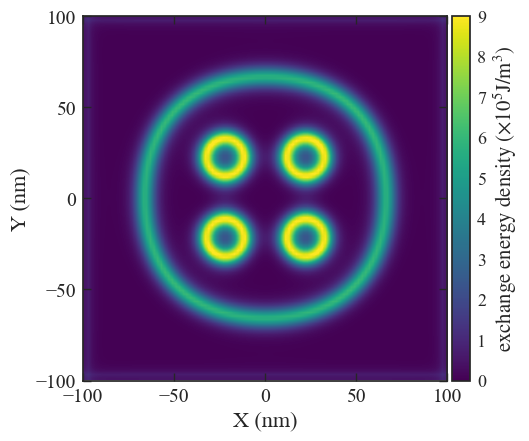

In [9]:
#A能量密度
fig, ax = plt.subplots(figsize=(5,5))
E_0 = df.Field.fromfile('F:\模拟文件2\skg\compute-11\skg-Oxs_UniformExchange-exchange-Energy_density-00-0000000.oef')
(E_0*1e-5).plane(z=0).mpl.scalar(ax=ax,cmap='viridis',interpolation='bilinear',
                          colorbar=True,colorbar_label=r'$\mathrm{exchange\ energy\ density\ (\times 10^{5}J/m^{3})}$',clim=(0,9))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlabel('X (nm)',size=16)
ax.set_ylabel('Y (nm)',size=16)
ax.tick_params(axis='both',which='minor',length=0)
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
plt.savefig('f:/tupian/wenzhang2/den_4.png',dpi=600,bbox_inches='tight')
plt.show()

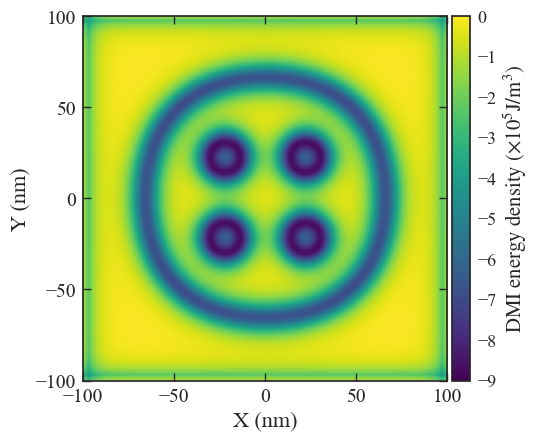

In [10]:
#D能量密度
fig, ax = plt.subplots(figsize=(5,5))
E_0 = df.Field.fromfile('F:\模拟文件2\skg\compute-10\skg-Oxs_DMI_Cnv_z-dmi-Energy_density-00-0000000.oef')
(E_0*1e-5).plane(z=0).mpl.scalar(ax=ax,cmap='viridis',interpolation='bilinear',
                          colorbar=True,colorbar_label=r'$\mathrm{DMI\ energy\ density\ (\times 10^{5}J/m^{3})}$',clim=(-9,0))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlabel('X (nm)',size=16)
ax.set_ylabel('Y (nm)',size=16)
ax.tick_params(axis='both',which='minor',length=0)
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
plt.savefig('f:/tupian/wenzhang2/den_3.png',dpi=600,bbox_inches='tight')
plt.show()

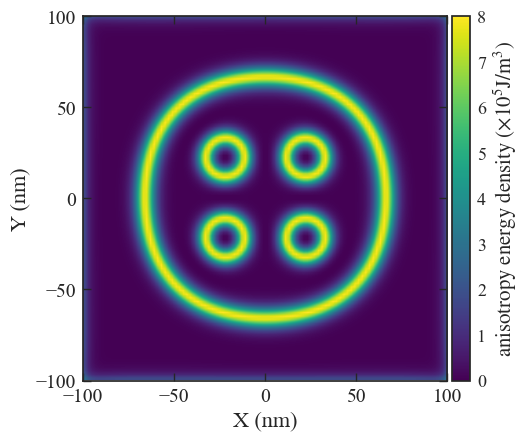

In [13]:
#K能量密度
fig, ax = plt.subplots(figsize=(5,5))
E_0 = df.Field.fromfile('F:\模拟文件2\skg\compute-0\skg-Oxs_UniaxialAnisotropy-uniaxialanisotropy-Energy_density-00-0000000.oef')
E_9 = df.Field.fromfile('F:\模拟文件2\skg\compute-9\skg-Oxs_Demag-demag-Energy_density-00-0000000.oef')
(E_0*1e-5).plane(z=0).mpl.scalar(ax=ax,cmap='viridis',interpolation='bilinear',
                          colorbar=True,colorbar_label=r'$\mathrm{anisotropy\ energy\ density\ (\times 10^{5}J/m^{3})}$',clim=(0,8))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlabel('X (nm)',size=16)
ax.set_ylabel('Y (nm)',size=16)
ax.tick_params(axis='both',which='minor',length=0)
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
plt.savefig('f:/tupian/wenzhang2/den_1.png',dpi=600,bbox_inches='tight')
plt.show()

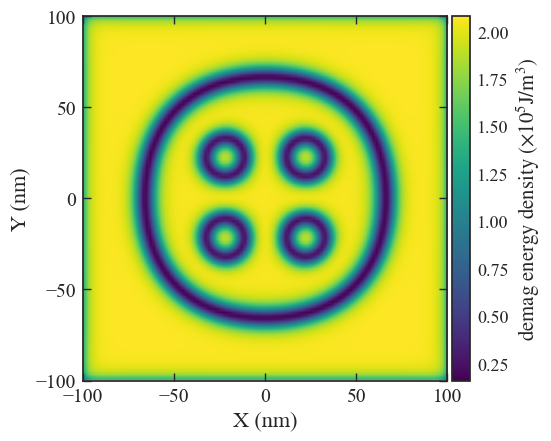

In [14]:
#退磁能量密度
fig, ax = plt.subplots(figsize=(5,5))
E_9 = df.Field.fromfile('F:\模拟文件2\skg\compute-9\skg-Oxs_Demag-demag-Energy_density-00-0000000.oef')
(E_9*1e-5).plane(z=0).mpl.scalar(ax=ax,cmap='viridis',interpolation='bilinear',
                          colorbar=True,colorbar_label=r'$\mathrm{demag\ energy\ density\ (\times 10^{5}J/m^{3})}$')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlabel('X (nm)',size=16)
ax.set_ylabel('Y (nm)',size=16)
ax.tick_params(axis='both',which='minor',length=0)
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
plt.savefig('f:/tupian/wenzhang2/den_2.png',dpi=600,bbox_inches='tight')
plt.show()

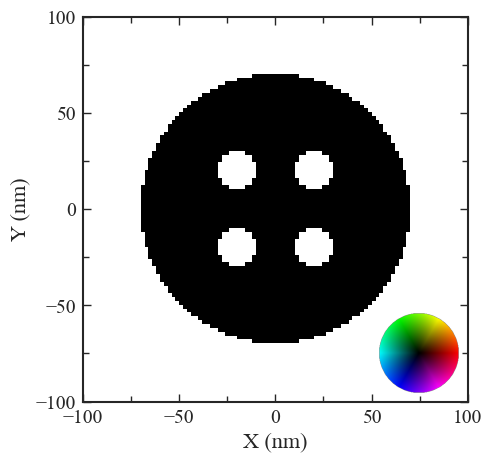

In [170]:
fig, ax = plt.subplots(figsize=(5,5))
system.m.orientation.plane(z=0).mpl.lightness(ax=ax,colorwheel=False)
ax.spines[['bottom','left','top','right']].set_lw(1.5)
df.plotting.mpl_field.add_colorwheel(ax=ax,width=0.8, height=0.8, loc="lower right")
ax.set_xlabel('X (nm)',fontsize=16)
ax.set_ylabel('Y (nm)',fontsize=16)
ax.set(xlim=(-100,100),ylim=(-100,100))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both',which='minor',length=4,width=1,direction='in')
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(25))
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
plt.savefig('f:/tupian/wenzhang2/4_0.png',dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
Md = oc.MinDriver()
Md.drive(system)

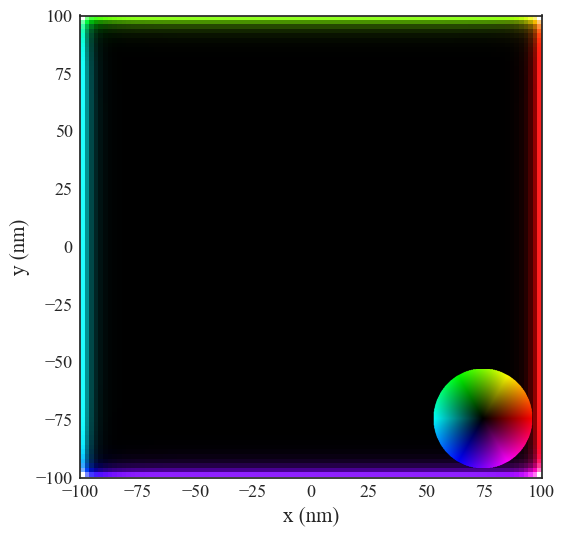

In [145]:
data = md.Data(name='skg')
i = -1
data[i][-1].plane(z=0).mpl.lightness(lightness_field=-data[i][-1].z,colorwheel=True)

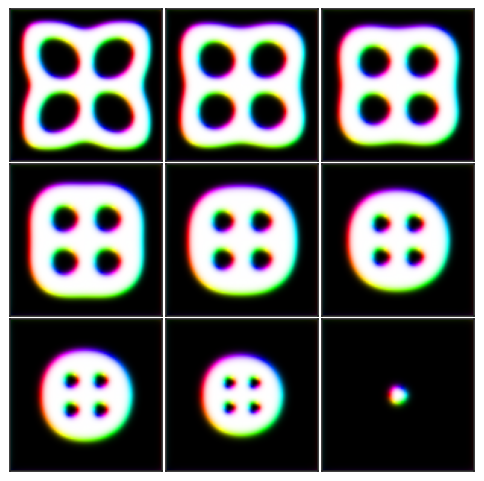

In [147]:
#关于A的相图
data = md.Data(name='skg')
fig, axs = plt.subplots(3,3,figsize=(6,6))
for i,j,k in zip(range(88,97,1),[0]*3+[1]*3+[2]*3,[0,1,2]*3): 
    data[i][-1].orientation.plane(z=0).mpl.lightness(
        ax=axs[j,k],lightness_field=-data[i][-1].z,colorwheel=False)
for j,k in zip([0]*3+[1]*3+[2]*3,[0,1,2]*3):
    axs[j,k].set_xlabel('')
    axs[j,k].set_ylabel('')
    axs[j,k].set_xticklabels([])
    axs[j,k].set_yticklabels([])
plt.subplots_adjust(hspace=0.02,wspace=0.02)
plt.savefig('f:/tupian/wenzhang2/4_5.png',dpi=600,bbox_inches='tight')
plt.show()

In [51]:
np.linspace(10,18,9)

array([10., 11., 12., 13., 14., 15., 16., 17., 18.])

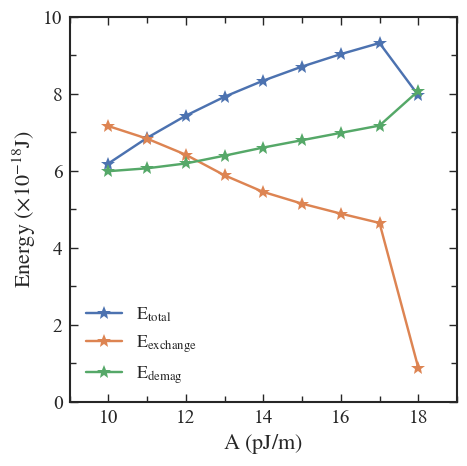

In [53]:
#能量随A变化
data = md.Data(name='skg')
mpl.rcParams['lines.markersize'] = 10
E_total = []
E_exchange = []
E_demag = []
for i in range(88,97,1): 
    e_total = data[i].table.data['E']
    e_exchange = data[i].table.data['E_exchange']
    e_demag = data[i].table.data['E_demag']
    E_total.append(e_total)
    E_exchange.append(e_exchange)
    E_demag.append(e_demag)
fig, ax = plt.subplots(figsize=(5,5))
X = np.linspace(10,18,9)
ax.plot(X,np.array(E_total)*1e18,'-*',label=r'$\mathrm{E_{total}}$')
ax.plot(X,np.array(E_exchange)*1e18,'-*',label=r'$\mathrm{E_{exchange}}$')
ax.plot(X,np.array(E_demag)*1e18,'-*',label=r'$\mathrm{E_{demag}}$')
ax.spines[['bottom','left','top','right']].set_lw(1.5)
ax.set_xlabel(r'$\mathrm{A\ (pJ/m)}$',fontsize=16)
ax.set_ylabel(r'$\mathrm{Energy\ (\times10^{-18}J)}$',fontsize=16)
ax.set(xlim=(9,19),ylim=(0,10))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both',which='minor',length=4,width=1,direction='in')
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.legend(loc='best',fontsize=13)
plt.savefig('f:/tupian/wenzhang2/4_6.png',dpi=600,bbox_inches='tight')
plt.show()

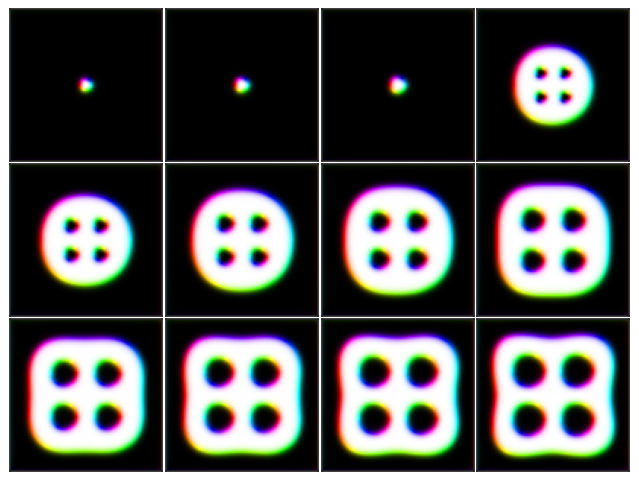

In [119]:
#关于D的相图
data = md.Data(name='skg')
fig, axs = plt.subplots(3,4,figsize=(8,6))
for i,j,k in zip(range(76,88,1),[0]*4+[1]*4+[2]*4,[0,1,2,3]*4): 
    data[i][-1].orientation.plane(z=0).mpl.lightness(
        ax=axs[j,k],lightness_field=-data[i][-1].z,colorwheel=False)
for j,k in zip([0]*4+[1]*4+[2]*4,[0,1,2,3]*4):
    axs[j,k].set_xlabel('')
    axs[j,k].set_ylabel('')
    axs[j,k].set_xticklabels([])
    axs[j,k].set_yticklabels([])
plt.subplots_adjust(hspace=0.02,wspace=0.02)
plt.savefig('f:/tupian/wenzhang2/4_3.png',dpi=600,bbox_inches='tight')
plt.show()

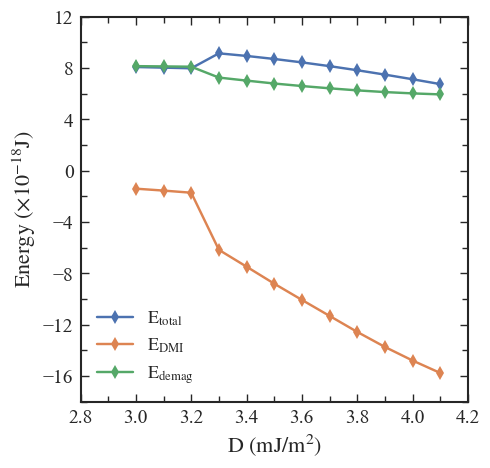

In [125]:
#能量随D变化
data = md.Data(name='skg')
E_total = []
E_dmi = []
E_demag = []
for i in range(76,88,1): 
    e_total = data[i].table.data['E']
    e_dmi = data[i].table.data['DMI_Cnv_z:dmi:Energy']
    e_demag = data[i].table.data['E_demag']
    E_total.append(e_total)
    E_dmi.append(e_dmi)
    E_demag.append(e_demag)
fig, ax = plt.subplots(figsize=(5,5))
X = np.linspace(3.0,4.1,12)
ax.plot(X,np.array(E_total)*1e18,'-d',label=r'$\mathrm{E_{total}}$')
ax.plot(X,np.array(E_dmi)*1e18,'-d',label=r'$\mathrm{E_{DMI}}$')
ax.plot(X,np.array(E_demag)*1e18,'-d',label=r'$\mathrm{E_{demag}}$')
ax.spines[['bottom','left','top','right']].set_lw(1.5)
ax.set_xlabel(r'$\mathrm{D\ (mJ/m^{2})}$',fontsize=16)
ax.set_ylabel(r'$\mathrm{Energy\ (\times10^{-18}J)}$',fontsize=16)
ax.set(xlim=(2.8,4.2),ylim=(-18,12))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both',which='minor',length=4,width=1,direction='in')
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(4))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2))
ax.legend(loc='best',fontsize=13)
plt.savefig('f:/tupian/wenzhang2/4_4.png',dpi=600,bbox_inches='tight')
plt.show()

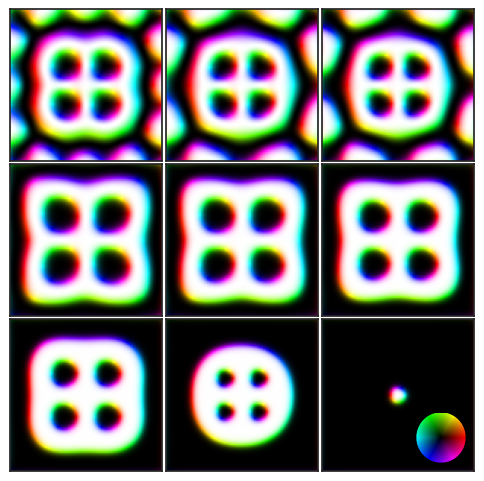

In [86]:
#关于K的相图
data = md.Data(name='skg')
fig, axs = plt.subplots(3,3,figsize=(6,6))
for i,j,k in zip(range(73,66,-1),[0]*3+[1]*3+[2],[0,1,2]*2+[0]): 
    data[i][-1].orientation.plane(z=0).mpl.lightness(
        ax=axs[j,k],lightness_field=-data[i][-1].z,colorwheel=False)
data[65][-1].orientation.plane(z=0).mpl.lightness(
    ax=axs[2,1],lightness_field=-data[65][-1].z,colorwheel=False)
data[66][-1].orientation.plane(z=0).mpl.lightness(
    ax=axs[2,2],lightness_field=-data[66][-1].z,colorwheel=False)
df.plotting.mpl_field.add_colorwheel(ax=axs[2,2],width=0.5, height=0.5, loc="lower right")
for j,k in zip([0]*3+[1]*3+[2]*3,[0,1,2]*3):
    axs[j,k].set_xlabel('')
    axs[j,k].set_ylabel('')
    axs[j,k].set_xticklabels([])
    axs[j,k].set_yticklabels([])
plt.subplots_adjust(hspace=0.02,wspace=0.02)
plt.savefig('f:/tupian/wenzhang2/4_1.png',dpi=600,bbox_inches='tight')
plt.show()

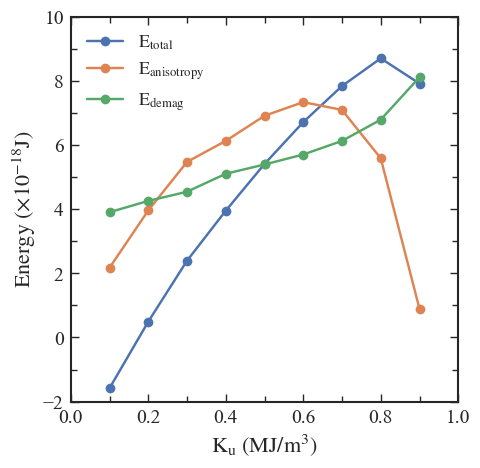

In [81]:
#能量随K变化
data = md.Data(name='skg')
E_total = []
E_ani = []
E_demag = []
for i in range(73,66,-1): 
    e_total = data[i].table.data['E']
    e_ani = data[i].table.data['E_uniaxialanisotropy']
    e_demag = data[i].table.data['E_demag']
    E_total.append(e_total)
    E_ani.append(e_ani)
    E_demag.append(e_demag)
E_total += [data[65].table.data['E'],data[66].table.data['E']]
E_ani += [data[65].table.data['E_uniaxialanisotropy'],data[66].table.data['E_uniaxialanisotropy']]
E_demag += [data[65].table.data['E_demag'],data[66].table.data['E_demag']]
fig, ax = plt.subplots(figsize=(5,5))
X = np.linspace(0.1,0.9,9)
ax.plot(X,np.array(E_total)*1e18,'-o',label=r'$\mathrm{E_{total}}$')
ax.plot(X,np.array(E_ani)*1e18,'-o',label=r'$\mathrm{E_{anisotropy}}$')
ax.plot(X,np.array(E_demag)*1e18,'-o',label=r'$\mathrm{E_{demag}}$')
ax.spines[['bottom','left','top','right']].set_lw(1.5)
ax.set_xlabel(r'$\mathrm{K_{u}\ (MJ/m^{3})}$',fontsize=16)
ax.set_ylabel(r'$\mathrm{Energy\ (\times10^{-18}J)}$',fontsize=16)
ax.set(xlim=(0,1.0),ylim=(-2,10))
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both',which='minor',length=4,width=1,direction='in')
ax.tick_params(axis='both',which='major',length=6,width=1,direction='in',labelsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.legend(loc='best',fontsize=13)
plt.savefig('f:/tupian/wenzhang2/4_2.png',dpi=600,bbox_inches='tight')
plt.show()

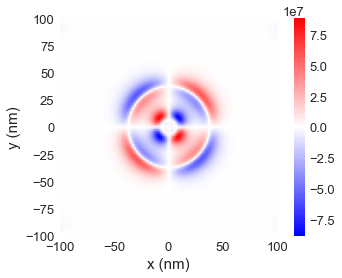

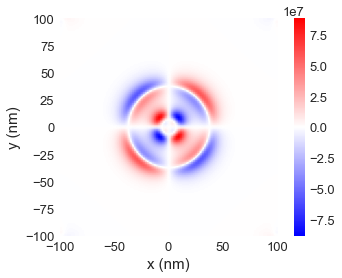

In [12]:
data = md.Data(name='skg')
m = data[-1][0].orientation
a = m.derivative('y').x
b = m.y.derivative('x')
a.plane('z').mpl.scalar(cmap='bwr')
b.plane('z').mpl.scalar(cmap='bwr')

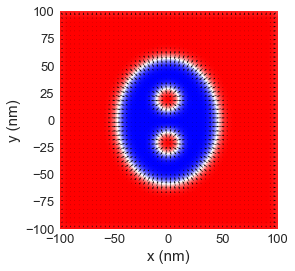

In [4]:
data = md.Data(name='skg')
data[58][-1].orientation.plane(z=5e-10,n=(50,50)).mpl(
                                        vector_kw={'scale':40},
                                        scalar_kw={'cmap':'bwr',
                                                    'colorbar':False,
                                                    'interpolation':'bilinear'})

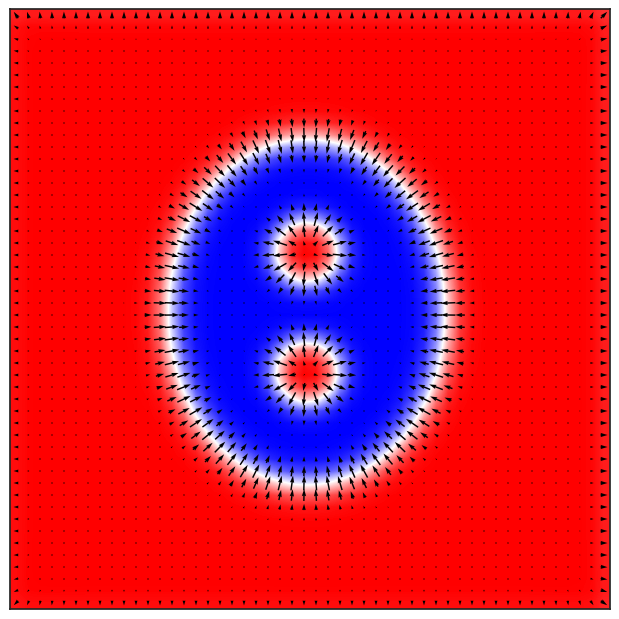

In [5]:
data = md.Data(name='skg')
with plt.style.context(['seaborn-white']):
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0., 0., 1., 1.])
    data[58][-1].orientation.plane('z',n=(50,50)).mpl(ax=ax,
                                        vector_kw={'scale':40},
                                        scalar_kw={'cmap':'bwr',
                                                    'colorbar':False,
                                                    'interpolation':'bilinear'})
    ax.set(xlabel='',ylabel='',xticklabels='',yticklabels='')
    plt.tick_params('both',length=0)
    plt.savefig('f:/tupian/skyshu2.png',dpi=600,bbox_inches='tight')
    plt.show()

In [46]:
data[55].table.data['E']

0    8.041609e-18
Name: E, dtype: float64

In [2]:
import discretisedfield.tools as dft
data = md.Data(name='skg')
dft.topological_charge(data[-1][-1].plane('z'))

2.936934859135661

In [7]:
print(y4-y)

0      0.902270
1      0.951951
2      0.976150
3      0.987932
4      0.993651
         ...   
295    0.997848
296    0.994212
297    0.985644
298    0.966166
299    0.923249
Name: vz, Length: 300, dtype: float64


In [ ]:
#计算斯格明子尺寸
data = md.Data(name='wenzhang2')
y4 = data[-2][-1].orientation.line(p1=(-100e-9,0,0),p2=(100e-9,0,0),n=200).data['vz']
y = [0]*200
x = data[-2][-1].orientation.line(p1=(-100e-9,0,0),p2=(100e-9,0,0),n=200).data['px']*1e9
arg = np.argwhere(np.diff(np.sign(y4-y))).flatten()
a = list(x[arg])
a[1] - a[0]

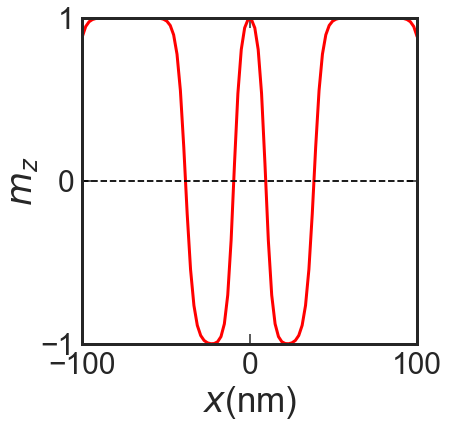

In [63]:
import matplotlib as mpl
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.serif']=['Times New Roman']
data = md.Data(name='skg')
y4 = data[55][-1].orientation.line(p1=(-100e-9,0,0),p2=(100e-9,0,0)).data['vz']
with plt.style.context(['seaborn-white']):
    fig,ax = plt.subplots(figsize=(6,6))
    ax.plot(np.linspace(-100,100,100),y4,'r-',lw=3)
    ax.plot(np.linspace(-100,100,100),[0]*100,'k--')
    y_major_locator = plt.MultipleLocator(1)
    ax.yaxis.set_major_locator(y_major_locator)
    ax.xaxis.set_major_locator(plt.MultipleLocator(100))
    ax.set_xlabel('$x$(nm)',size=35)
    ax.set_ylabel('$m_z$',size=35,labelpad=0)
    ax.set_xlim(-100,100)
    ax.set_ylim(-1,1)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.spines[['left','bottom','top','right']].set_linewidth(3)
    plt.tick_params('both',labelsize=30,pad=8,direction='in',length=10,width=1.5)
    plt.savefig('f:/tupian/line1.png',dpi=600,bbox_inches='tight')
    plt.show()

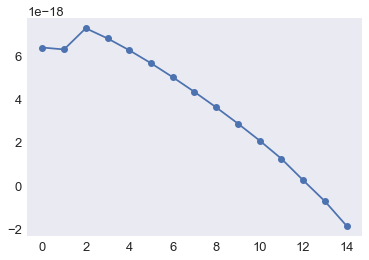

In [170]:
E = []
for i in range(-15,0,1):
    e = data[i].table.data['E']
    E.append(e)
plt.plot(E,marker='o')

In [88]:
E_tol = []
for i in range(-11,0,1):
    E = data[i].table.data['E']
    E_tol.append(E)
print(E_tol)

[0    6.273910e-18
Name: E, dtype: float64, 0    6.441249e-18
Name: E, dtype: float64, 0    6.601744e-18
Name: E, dtype: float64, 0    6.754776e-18
Name: E, dtype: float64, 0    6.899508e-18
Name: E, dtype: float64, 0    7.034754e-18
Name: E, dtype: float64, 0    7.158960e-18
Name: E, dtype: float64, 0    7.270706e-18
Name: E, dtype: float64, 0    7.369532e-18
Name: E, dtype: float64, 0    7.455780e-18
Name: E, dtype: float64, 0    6.226613e-18
Name: E, dtype: float64]


In [ ]:
import os
if not os.path.exists('f:/tupian'):
    os.mkdir('f:/tupian')
data = md.Data(name='skg')
for i in range(-9,-1,1):
    fig, ax = plt.subplots(figsize=(6,6),dpi=100)
    data[i][0].orientation.z.plane(z=0).mpl.scalar(ax=ax,cmap='bwr',colorbar=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig('f:/tupian/sky_size{}.png'.format(str(i)))
    plt.show()

In [42]:
#线性拟合
x = data[-2][0].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).data['r'] * 1e9
y = data[-2][0].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).data['vz']
z1 = np.polyfit(x,y,3)
p1 = np.poly1d(z1)
print(p1)

            3            2
-2.983e-14 x + 0.000191 x - 0.03821 x + 1.57


In [45]:
from scipy.optimize import bisect
bisect(p1,125,150,xtol=2)

142.1875

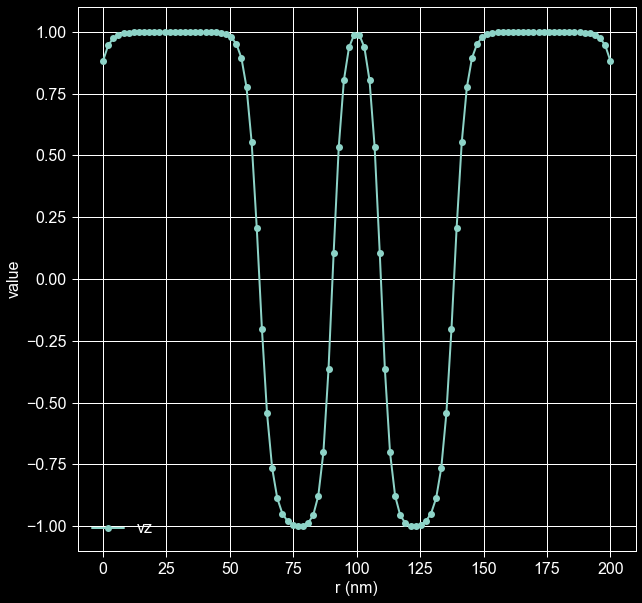

In [3]:
data = md.Data(name='skg')
with plt.style.context(['notebook','dark_background']):
    data[-1][-1].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).mpl(figsize=(10,10),yaxis=['vz'],marker='o')

In [98]:
R = []
for i in range(-11,0,1):
    y1 = data[i][0].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).data['r']
    y2 = data[i][0].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).data['vz']
    dic = dict(zip(y1,y2))
    a = sorted(dic.items(), key = lambda dic: abs(dic[1]))[:6]
    a1 = abs(a[1][0]-a[0][0])
    a2 = abs(a[3][0]-a[2][0])
    a3 = abs(a[5][0]-a[4][0])
    b = sorted([a1,a2,a3])
    R.append(b[-1]*1e9)
R[1] = 150.00
print(R)

[151.51515151515153, 150.0, 147.4747474747475, 143.43434343434345, 139.3939393939394, 135.35353535353536, 127.2727272727273, 115.15151515151514, 107.07070707070707, 94.94949494949495, 22.222222222222214]


In [104]:
r = []
for i in range(-11,0,1):
    y1 = data[i][0].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).data['r']
    y2 = data[i][0].orientation.line(p1=[-100e-9,0,0],p2=[100e-9,0,0]).data['vz']
    dic = dict(zip(y1,y2))
    a = sorted(dic.items(), key = lambda dic: abs(dic[1]))[:6]
    b = sorted([x[0] for x in a])
    c = min(abs(b[0]-b[1]),abs(b[1]-b[2]),abs(b[2]-b[3]))
    r.append(c*1e9)
    print(f'{c*1e9:.2f}nm')

26.26nm
26.26nm
26.26nm
24.24nm
22.22nm
20.20nm
18.18nm
16.16nm
14.14nm
10.10nm
2.02nm


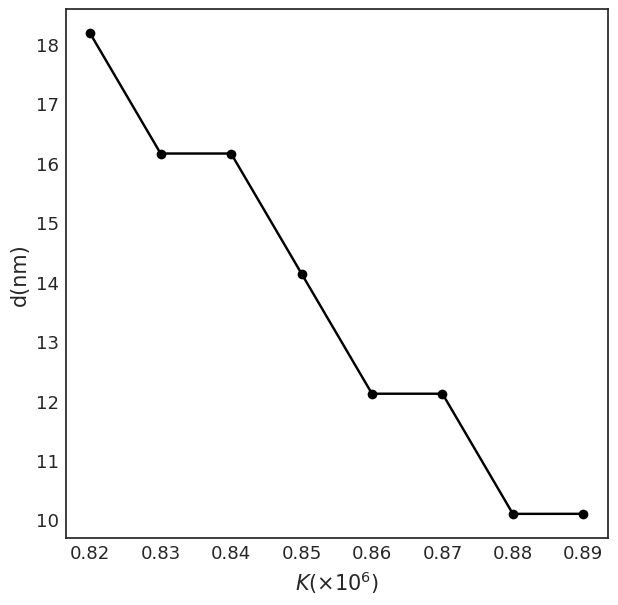

In [82]:
with plt.style.context(['seaborn-white','ieee']):
    plt.figure(figsize=(7,7),dpi=100)
    plt.plot(np.arange(0.82,0.89,0.01),r,marker='o')
    plt.xlabel(r'$K(\times10^6)$')
    plt.ylabel('d(nm)')
    plt.savefig('f:/tupian/r.png')
    plt.show()

In [48]:
data = md.Data(name='skg')
E = []
for i in range(-9,-1,1):
    e = data[i].table.data['E']
    E.append(e)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


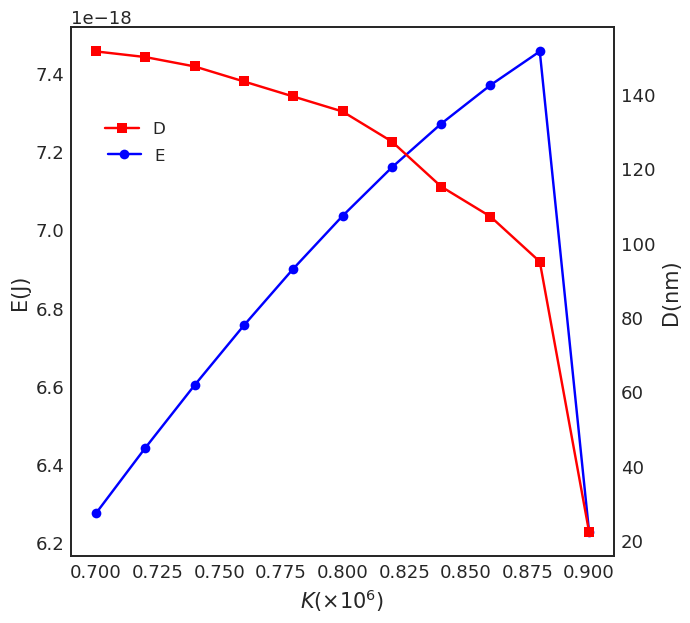

In [101]:
import matplotlib as mpl
mpl.rc({'marker_size':20})
with plt.style.context(['seaborn-white','ieee']):
    plt.figure(figsize=(7,7),dpi=100)
    ax1 = plt.subplot()
    ax2 = ax1.twinx()
    ax1.set_xlabel(r'$K(\times10^6)$')
    ax1.set_ylabel('E(J)')
    ax2.set_ylabel('D(nm)')
    ax1.plot(np.arange(0.70,0.90,0.02),E_tol,c='b',label='E',marker='o')
    ax2.plot(np.arange(0.70,0.90,0.02),R,c='r',label='D',marker='s')
    ax1.legend(bbox_to_anchor=(0.2,0.8))
    ax2.legend(bbox_to_anchor=(0.2,0.85))
    plt.show()

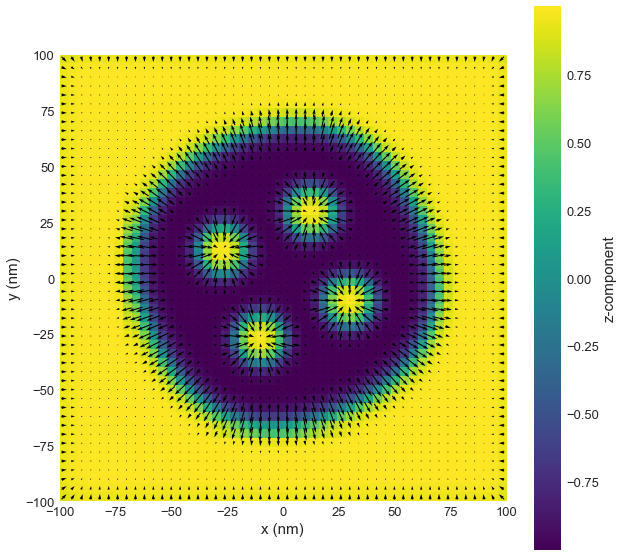

In [47]:
#非规则斯格明子袋
system.m.orientation.plane('z',n=(50,50)).mpl(figsize=(10,10))

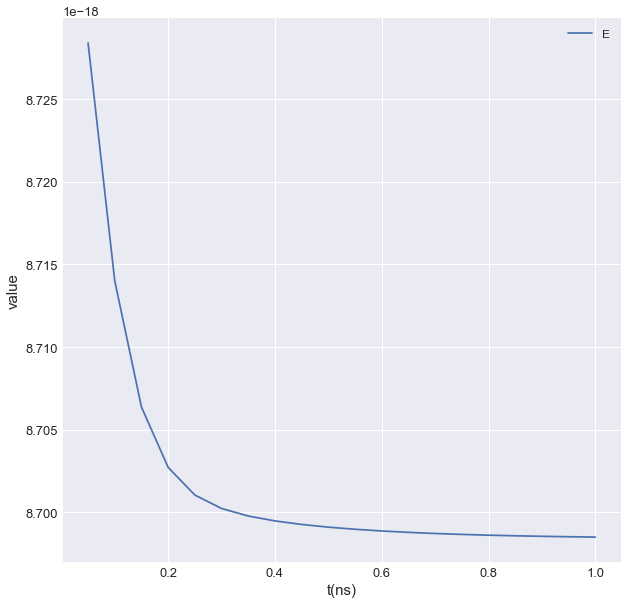

In [48]:
#及能量
system.table.mpl(figsize=(10,10),y=['E'])

In [ ]:
import k3d
data = md.Data(name='skg')
plot = k3d.plot()
data[-1][0].orientation.k3d.vector(plot=plot,color_field=data[-1][0].z,points=False,
                                   cmap='bwr',head_size=25,line_width=0.5)
plot.display()

In [ ]:
#re
import matplotlib as mpl
import re
L = str(mpl.font_manager.fontManager.ttflist)
re.findall("name='\w{0,10}'",L)
str = 'www.\\5678.com\\'
re.search(r'www.\\\d{4}.com\\',str).group()

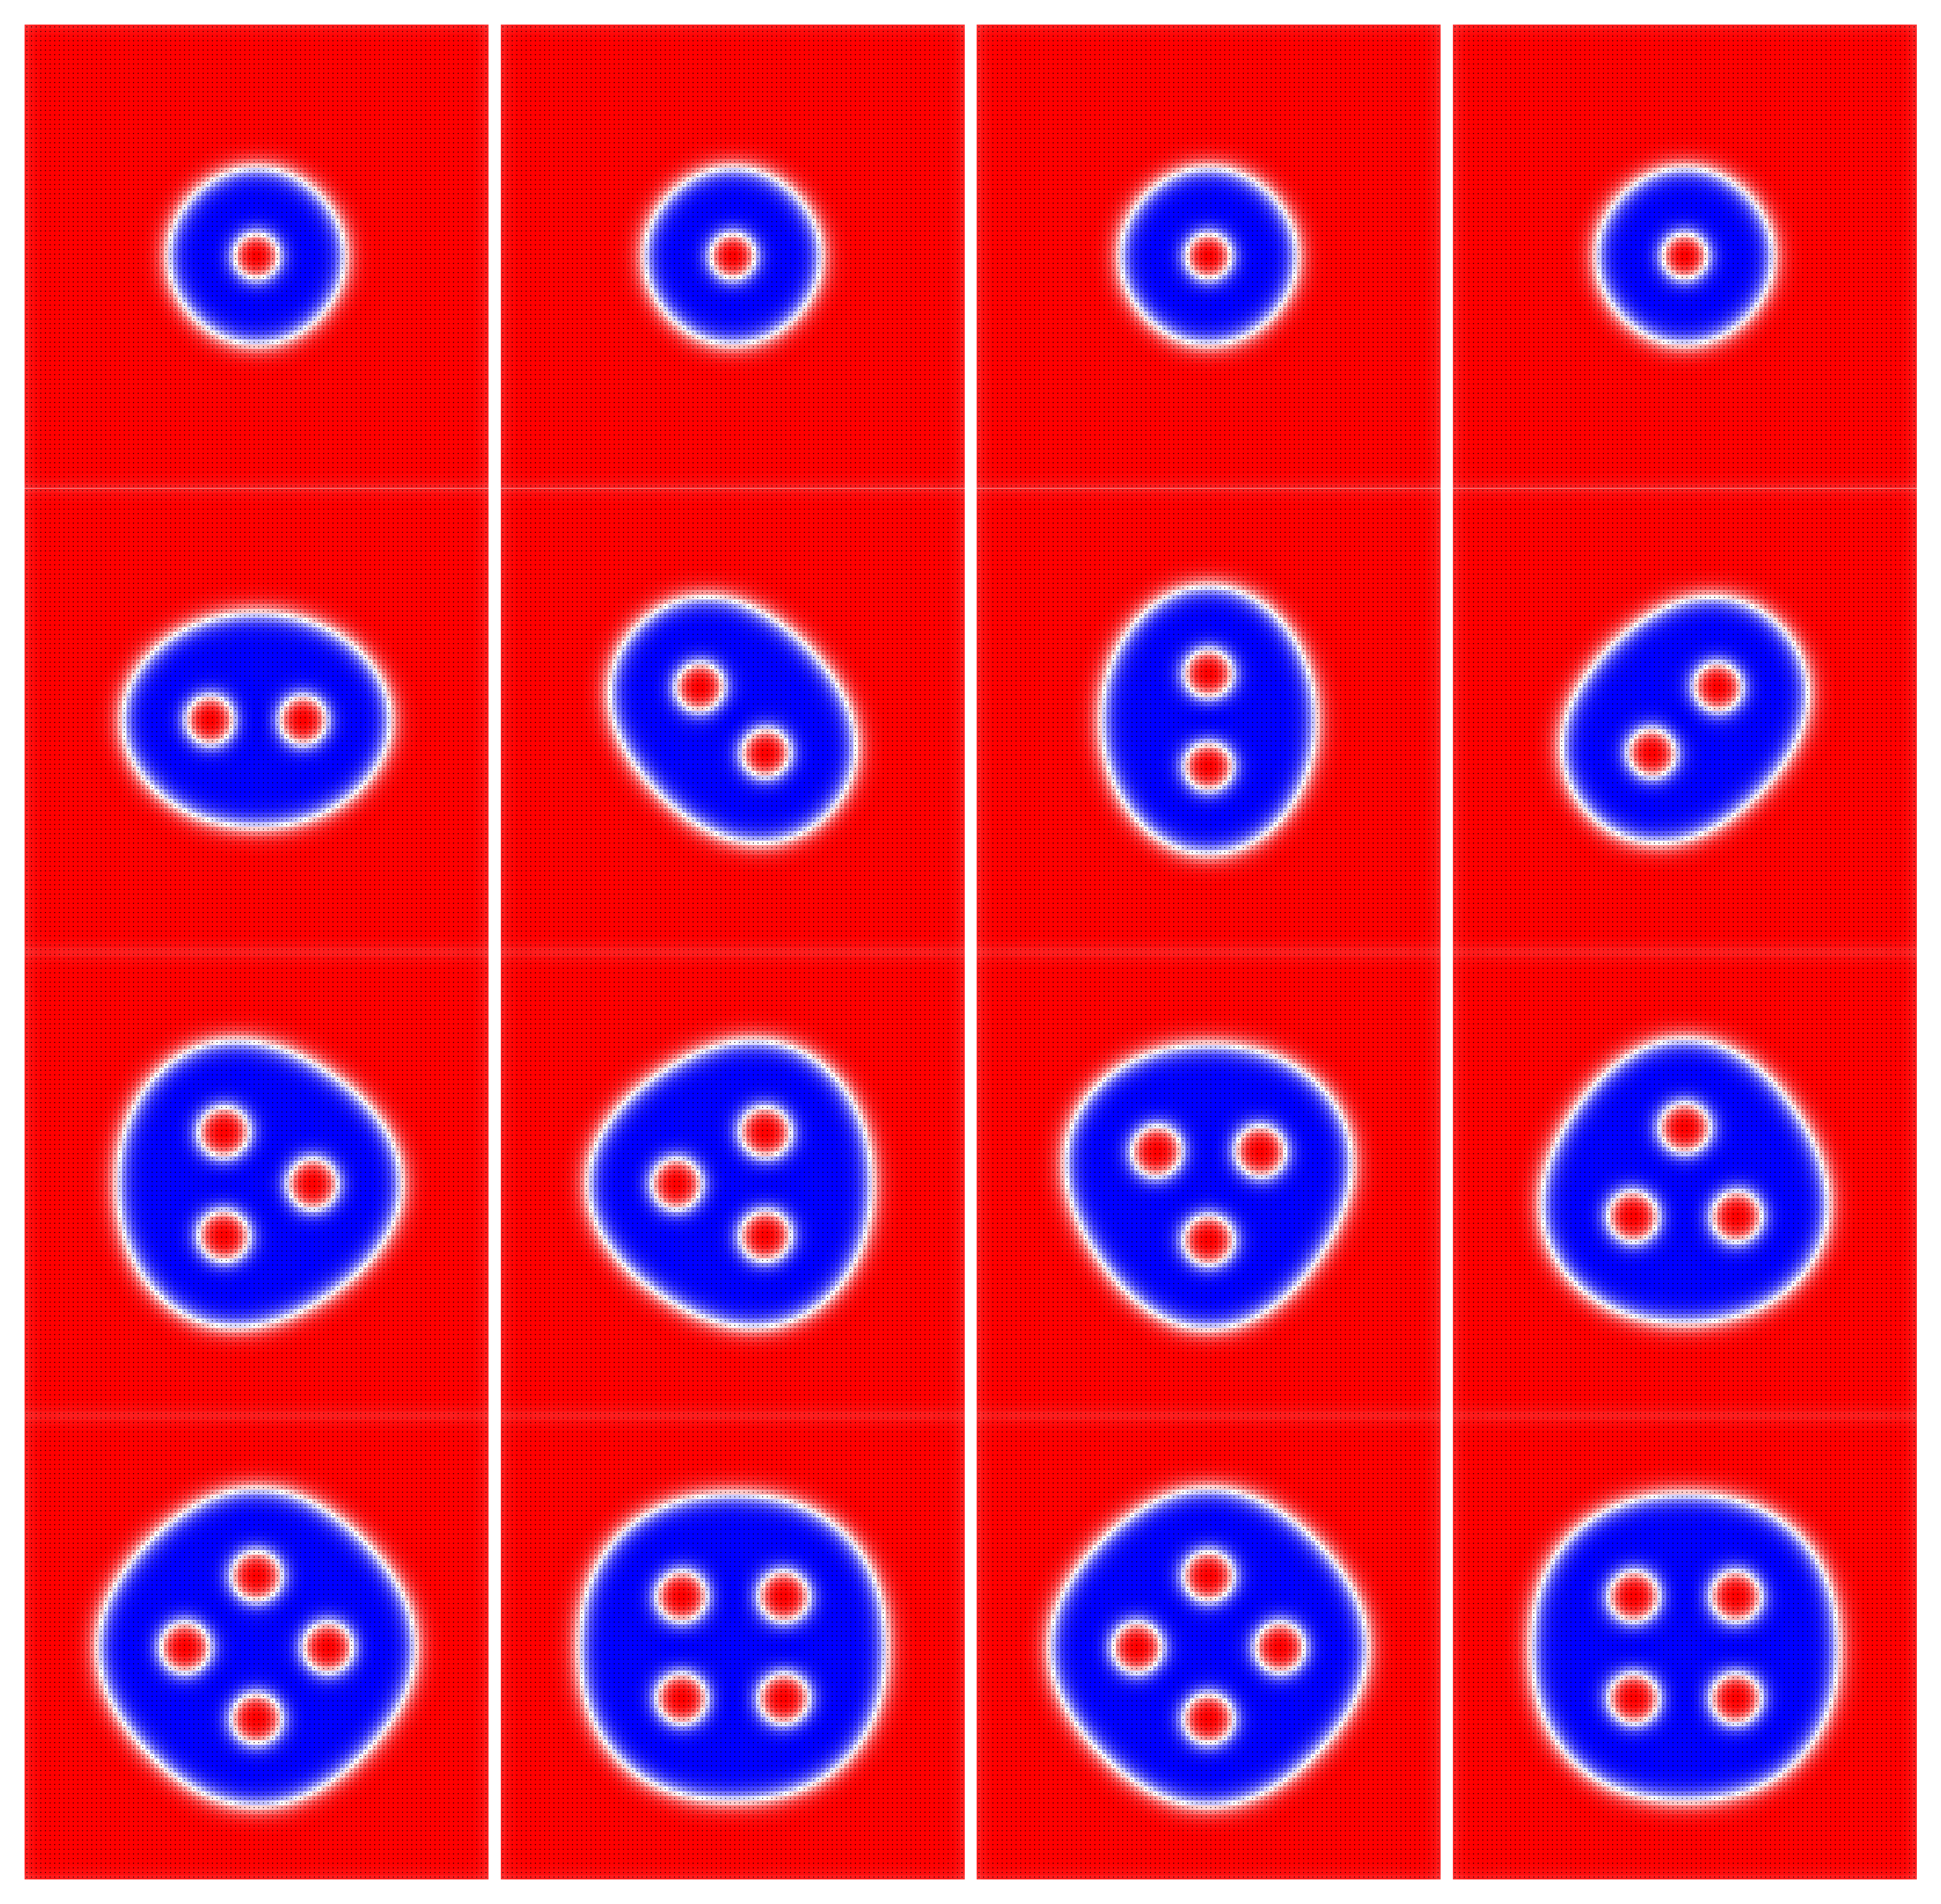

In [4]:
data = md.Data(name='skg')
fig = plt.figure(figsize=(10,10),dpi=600)
tupian_list = [55,55,55,55,54,59,58,60,53,61,62,63,52,64,52,64]
for j in range(1,17):
    axj=fig.add_subplot(4,4,j)
    data[tupian_list[j-1]][-1].orientation.plane('z').mpl(ax=axj,
                                        vector_kw={'scale':1e5,
                                                    'headwidth':3,
                                                    'linewidth':7},
                                        scalar_kw={'cmap':'bwr',
                                                    'colorbar':False})
    axj.set_xlabel('')
    axj.set_ylabel('')
    axj.set_xticks([])
    axj.set_yticks([])
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('f:/tupian/zuhe1',dpi=600,bbox_inches='tight')
plt.show()

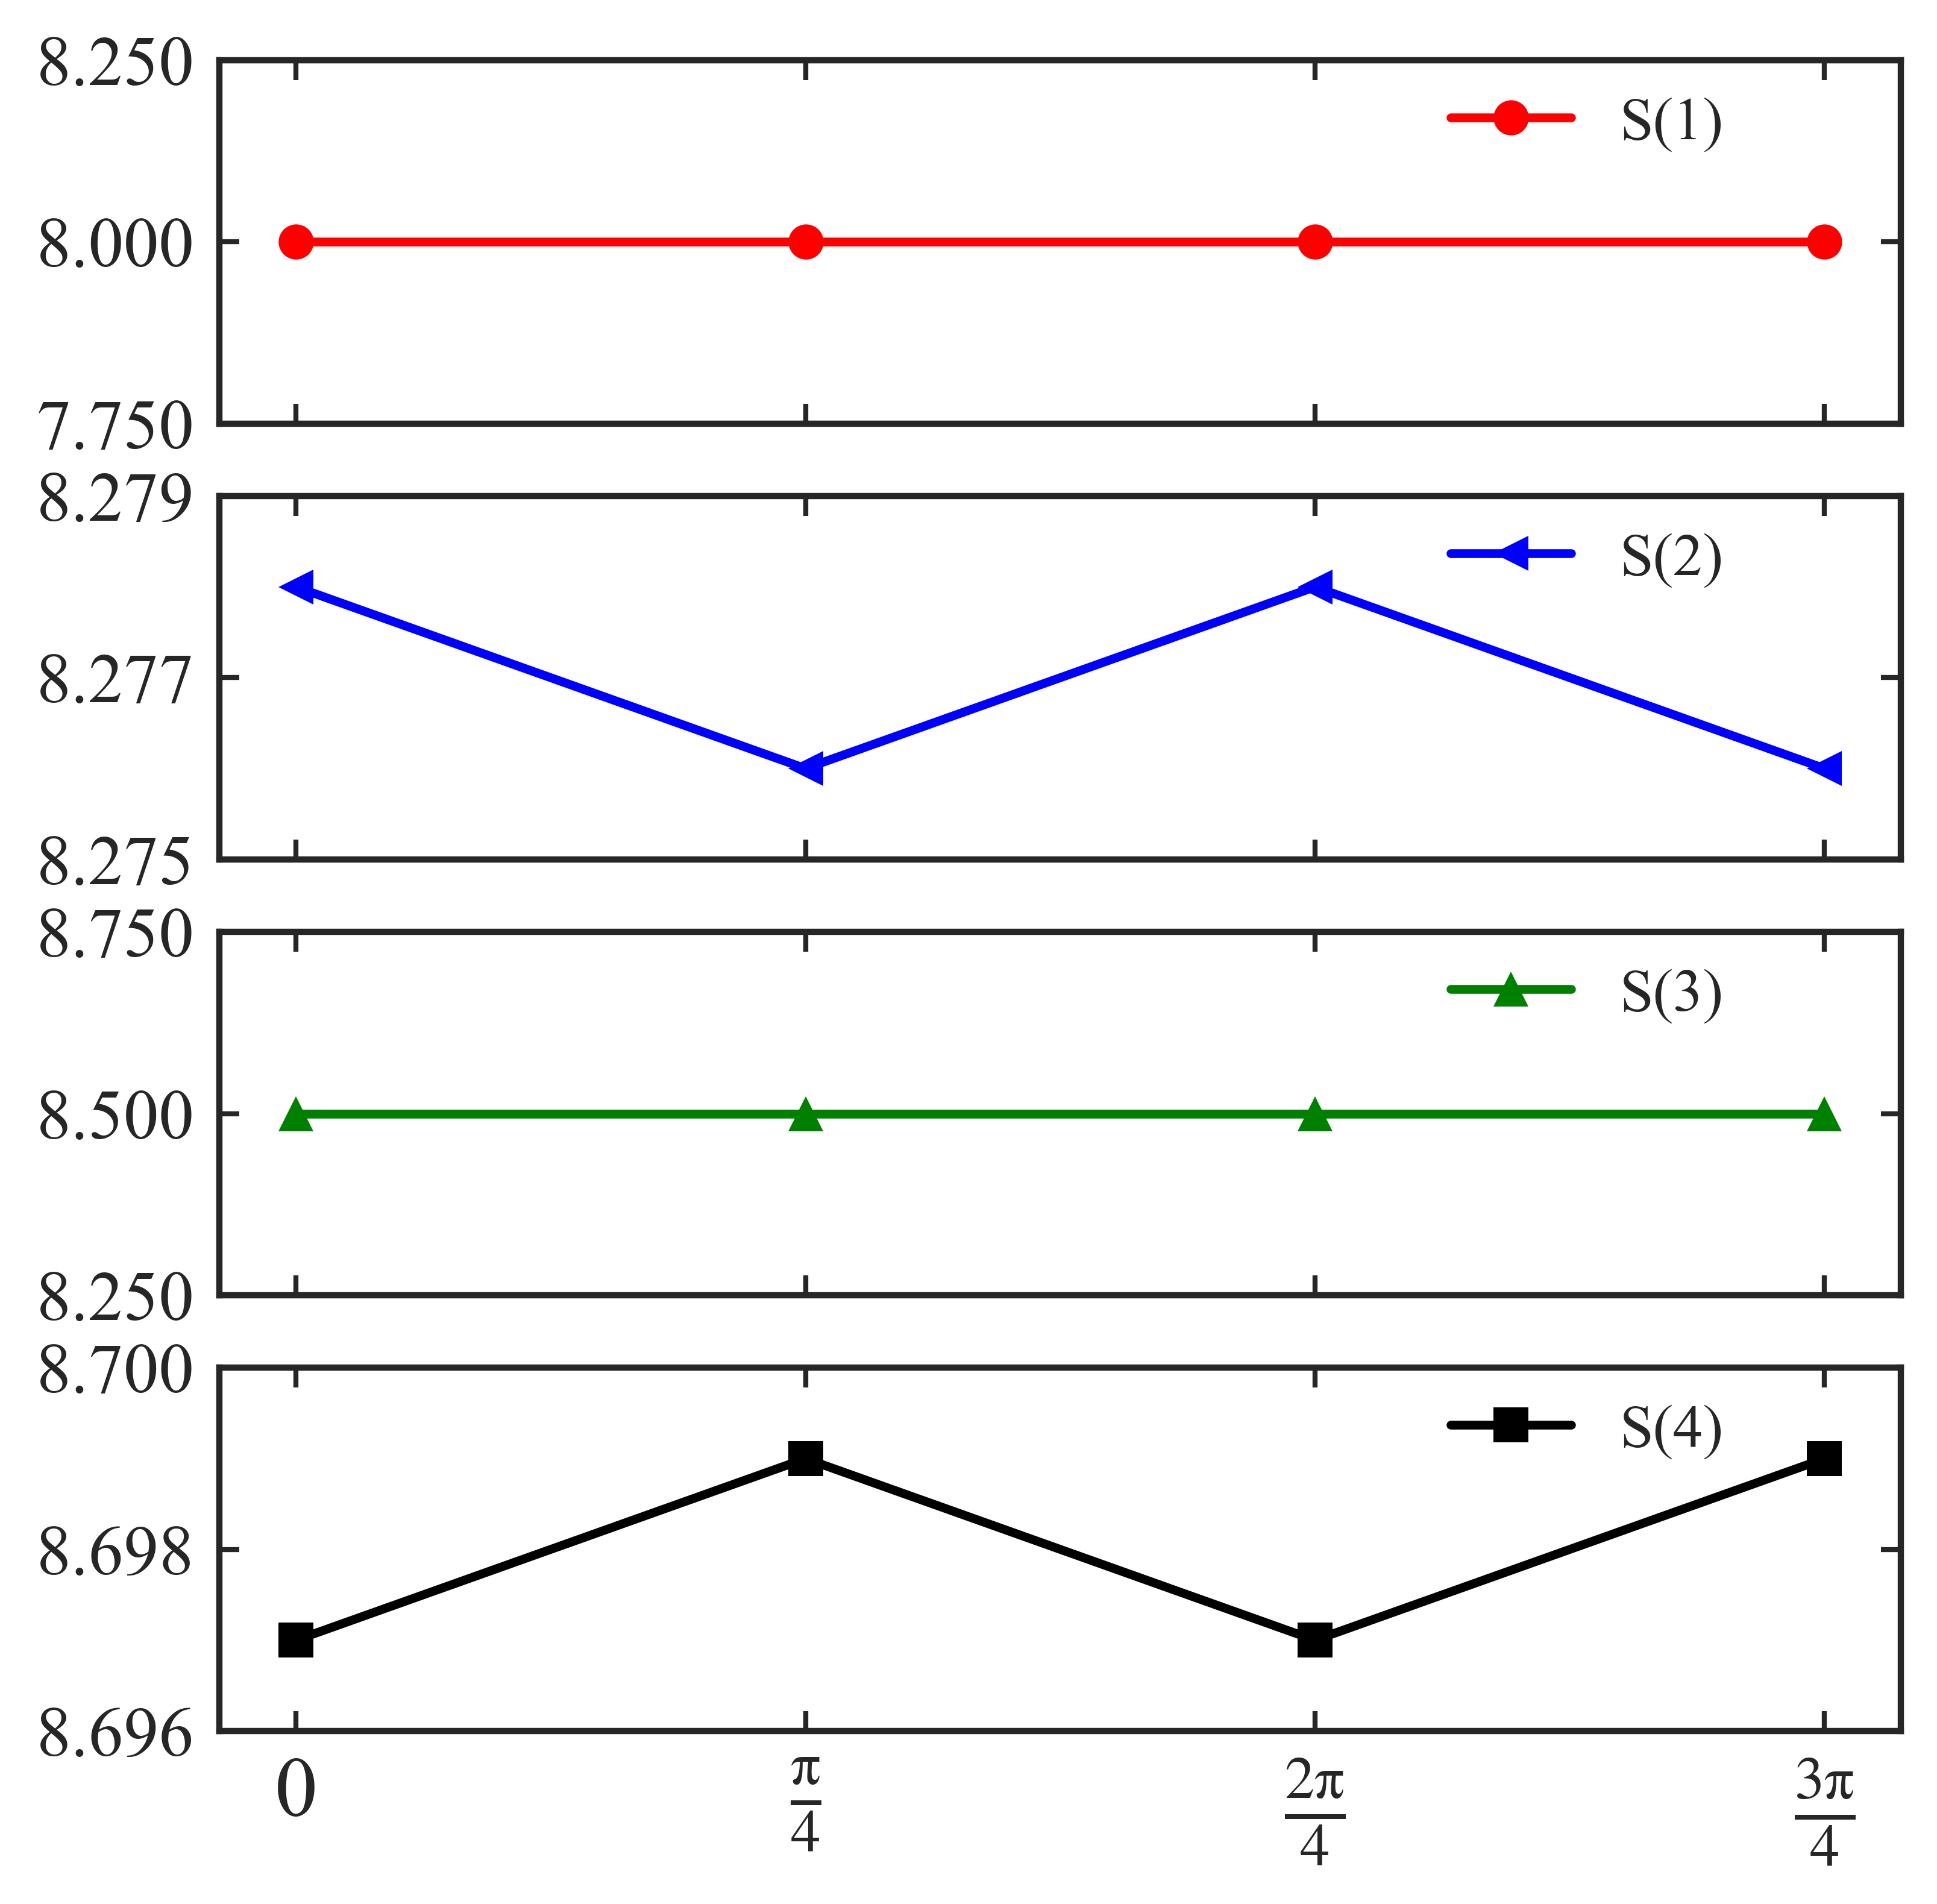

In [5]:
data = md.Data(name='skg')
tupian_list = [55,55,55,55,54,59,58,60,53,61,62,63,52,64,52,64]
E = []
pi = np.pi
X = [0,1,2,3]
for i in tupian_list:
    e = data[i].table.data['E']*1e18
    E.append(e)
E_new = list(map(lambda x:round(x,3),E))
fig,ax = plt.subplots(4,1,dpi=600,sharex=True,figsize=(6,6))
ax[0].plot(X,[8.000]*4,'ro-',label='S(1)')
ax[1].plot(X,[8.699,8.697,8.699,8.697],'b<-',label='S(2)')
ax[2].plot(X,[8.500]*4,'g^-',label='S(3)')
ax[3].plot(X,[8.697,8.699,8.697,8.699],'ks-',label='S(4)')
for i in range(4):
    ax[i].tick_params(axis='both', which='minor', length=0)
    ax[i].tick_params(axis='both', which='major', length=4, direction='in',labelsize=14)
    ax[i].legend(bbox_to_anchor=(0.7, 0.6))
    ax[i].xaxis.set_ticks_position('both')
    ax[i].yaxis.set_ticks_position('both')
    ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'%.3f'% x))
ax[0].set(ylim=(7.750,8.250))
ax[1].set(ylim=(8.696,8.700))
ax[2].set(ylim=(8.250,8.750))
ax[3].set(ylim=(8.696,8.700))
ax[1].yaxis.set_major_locator(plt.FixedLocator([8.696,8.698,8.700]))
ax[1].set_yticklabels(['8.275','8.277','8.279'])
ax[3].xaxis.set_major_locator(plt.FixedLocator(X))
ax[3].set_xticklabels(["0", r"$\mathrm{\frac{\pi}{4}}$", r"$\mathrm{\frac{2\pi}{4}}$",  r"$\mathrm{\frac{3\pi}{4}}$"],fontsize=17)
plt.savefig('f:/tupian/zong_neng.png',dpi=600,bbox_inches='tight')
plt.show()    

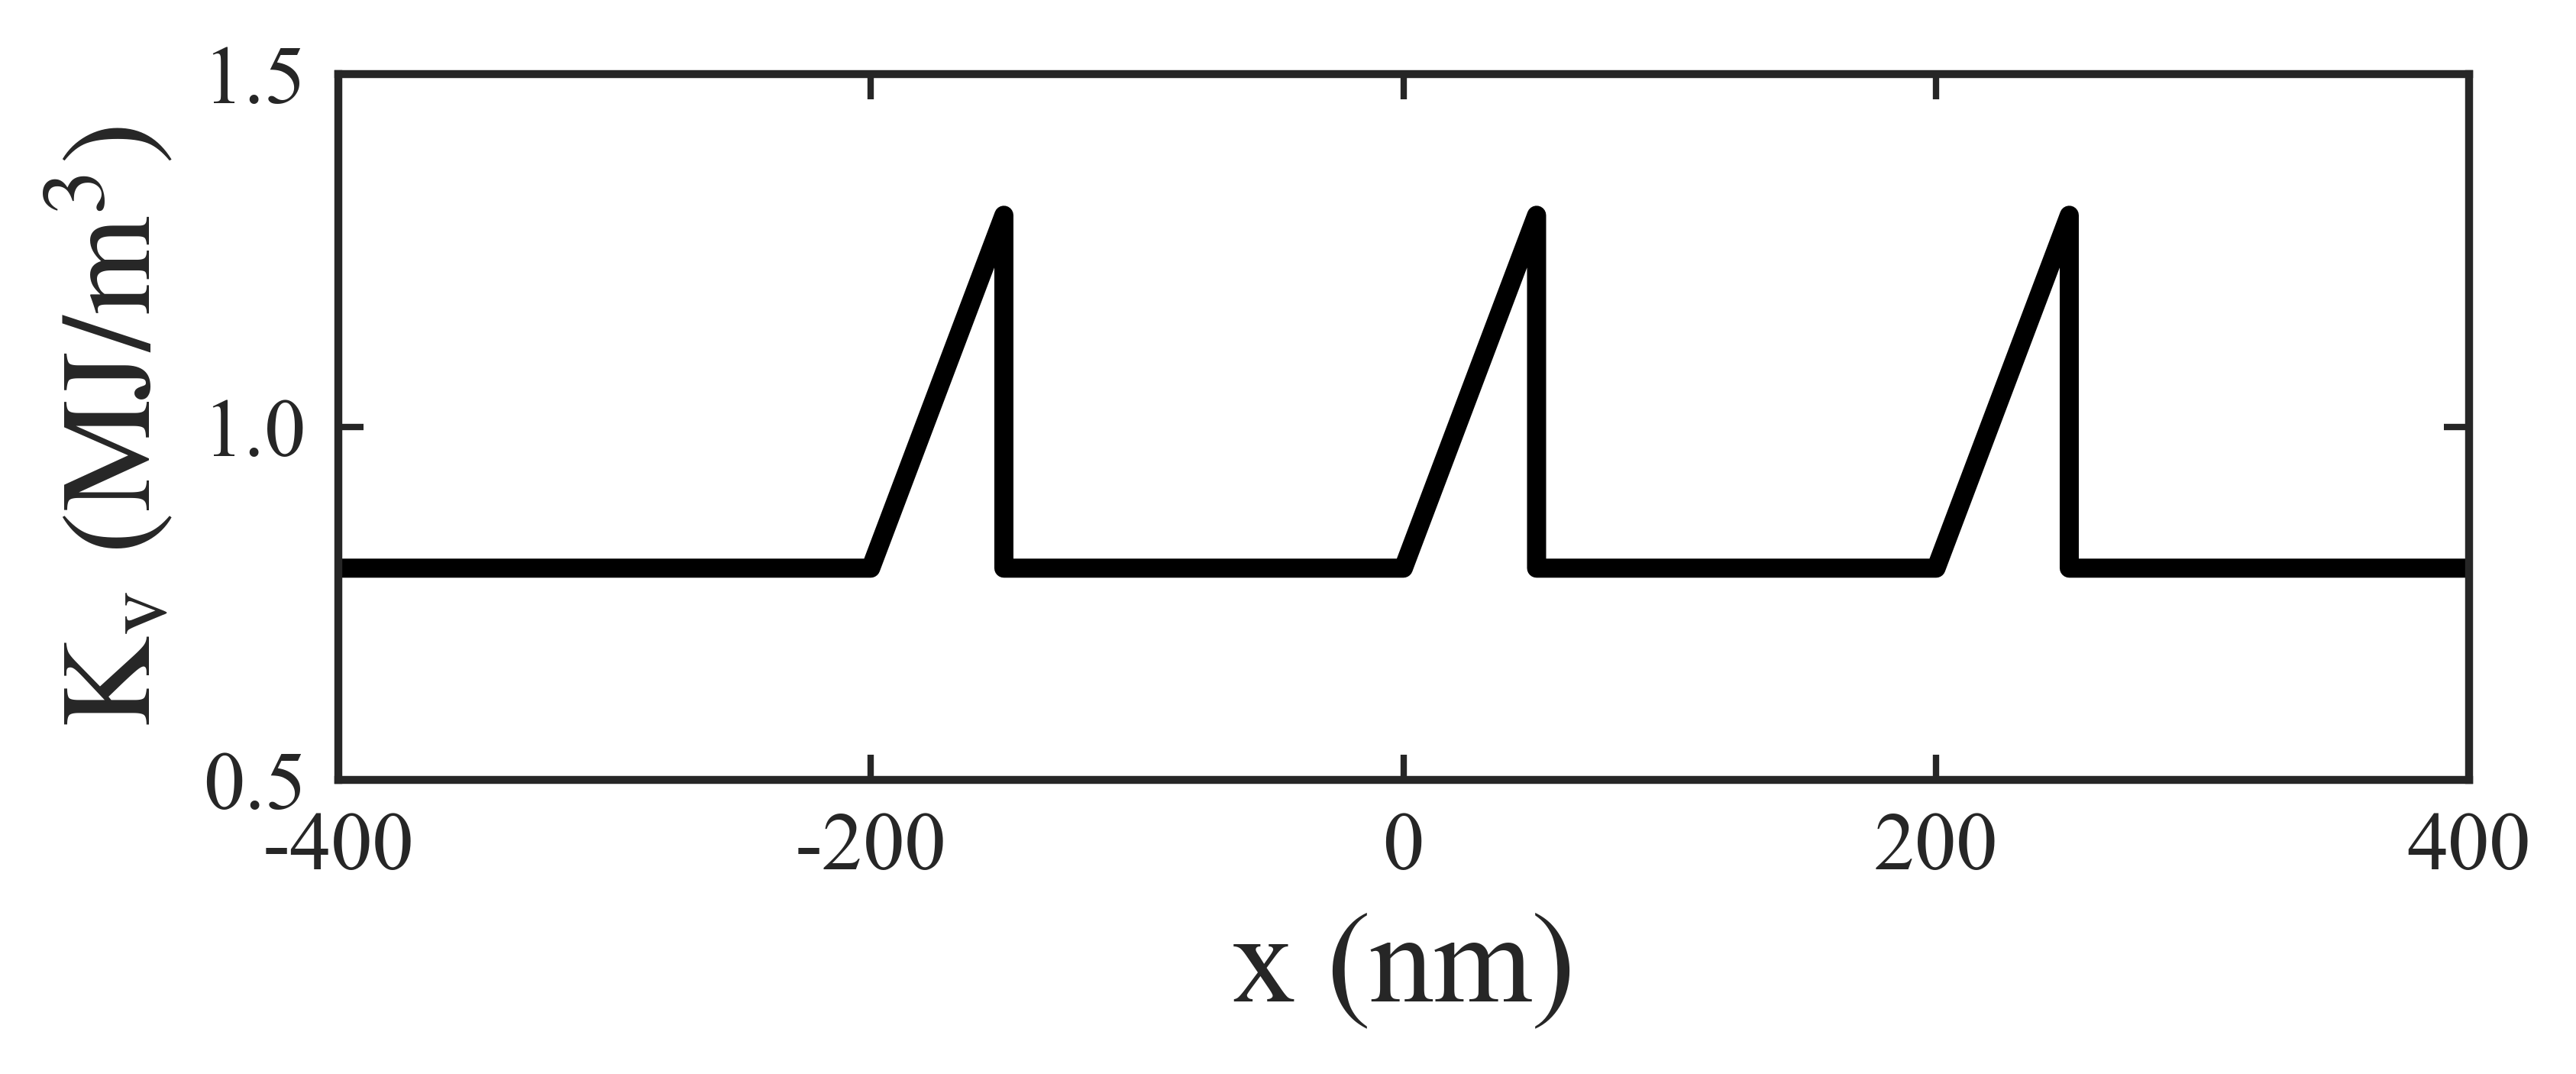

In [7]:
fig, ax = plt.subplots(figsize=(6,2),dpi=600)
x = list(np.linspace(-4,-2,5)) + [-1.5,-1.5] + [-1,-0.5,0] +[0.5,0.5]+[1,1.5,2]+[2.5,2.5]+[3,3.5,4]
y = [0.8]*5 + [1.3,0.8] + [0.8]*3 + [1.3,0.8] + [0.8]*3 + [1.3,0.8] + [0.8]*3
ax.plot(x,y,c='k',linewidth=3)
ax.set(ylim=(0.5,1.5),xlim=(-4,4))
ax.set_xlabel('x (nm)',size=20)
ax.set_ylabel(r'$\mathrm{K_{v}\ (MJ/m^{3})}$',size=20)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(plt.FixedLocator([-4,-2,0,2,4]))
ax.set_xticklabels(['-400','-200','0','200','400'])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.tick_params('both',which='minor',length=0)
plt.tick_params('both',which='major',length=4,direction='in')
plt.savefig('f:/tupian/moni2',dpi=600,bbox_inches='tight')
plt.show()

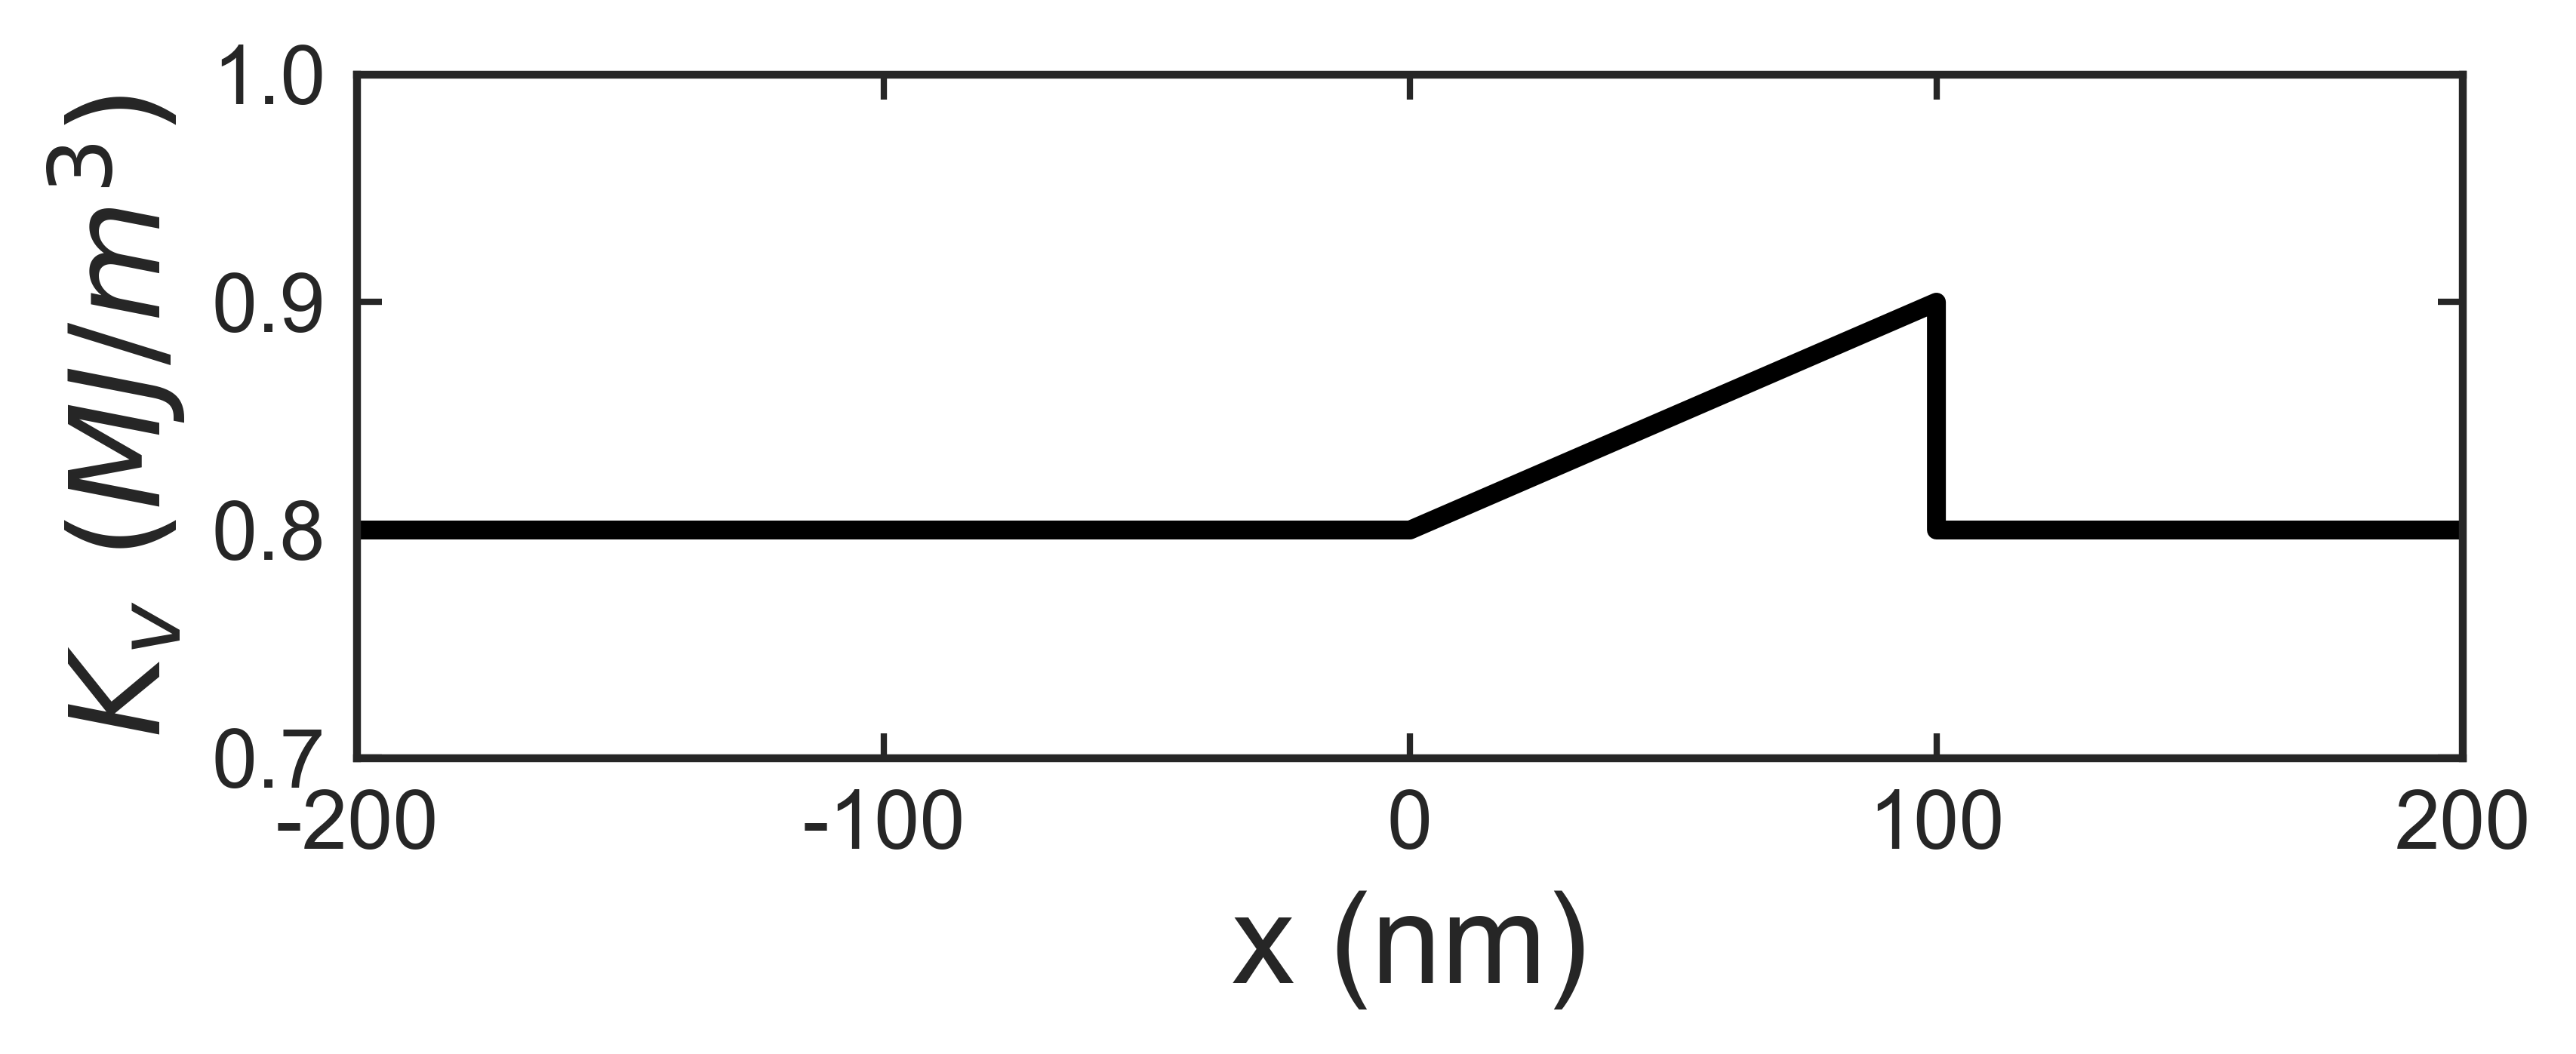

In [2]:
with plt.style.context(['seaborn-white']):
    fig, ax = plt.subplots(figsize=(6,2),dpi=600)
    x = [-2,-1,0,1,1,2]
    y = [0.8]*3 + [0.9] + [0.8]*2 
    ax.plot(x,y,c='k',linewidth=3)
    ax.set(xlim=(-2,2),ylim=(0.7,1.0))
    ax.set_xlabel('x (nm)',size=20)
    ax.set_ylabel(r'$K_{v}\ (MJ/m^{3})$',size=20)
    ax.xaxis.set_major_locator(plt.FixedLocator([-2,-1,0,1,2]))
    ax.set_xticklabels(['-200','-100','0','100','200'])
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.tick_params('both',which='minor',length=0)
    plt.tick_params('both',which='major',length=4,direction='in')
    plt.savefig('f:/tupian/wenzhang2/S1.tif',dpi=600,bbox_inches='tight')
    plt.show()

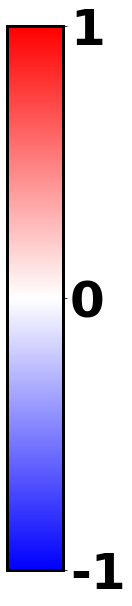

In [19]:
#colobar
import matplotlib as mpl
import matplotlib.pyplot as plt
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
fig,ax = plt.subplots(figsize=(1,10))
cbar = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm,cmap='bwr'),
            cax=ax,ticks=[-1,0,1])
cbar.ax.set_yticklabels(['-1', '0', '1'],size=50,fontdict={'weight':'bold'})
cbar.outline.set_linewidth(3)
plt.show()